### Installs

In [ ]:
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

In [10]:
import os
import sys
import pathlib
print(pathlib.Path().resolve())
from glob import glob

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



/home/daniel/thesis/conditional_segmentation_thesis


### Create DataFrame

In [23]:
#Get files
pattern = './logs/**/running_logs/*' #Gets all the log files
files = glob(pattern, recursive=True)
[print(i) for i in files]

./logs/CBCTUnetSeg/running_logs/segModeCTCV0_train_log_0.txt
./logs/ConditionalSegReversed/running_logs/CondisegCBCT_cv0_nc16_train_log_0.txt


[None, None]

In [51]:
#Get First File
df = pd.read_csv(files[0])

#Join rest of files without header.
df = pd.concat([df] + [pd.read_csv(i) for i in files[1:]], ignore_index = True, axis = 0)
df.head(500) #Quick check

,project,exp_name,fold,train_val_test,epoch,value,value_type
0,CBCTUnetSeg,segModeCTCV0,0,'train',1,2.705100,'loss'
1,CBCTUnetSeg,segModeCTCV0,0,'val',1,0.008245,'dice_mean'
2,CBCTUnetSeg,segModeCTCV0,0,'val',1,0.011142,'dice_std'
3,CBCTUnetSeg,segModeCTCV0,0,'train',2,2.655387,'loss'
4,CBCTUnetSeg,segModeCTCV0,0,'val',2,0.040551,'dice_mean'
...,...,...,...,...,...,...,...
495,ConditionalSegReversed,CondisegCBCT_cv0_nc16,0,'train',6,0.801573,'loss'
496,ConditionalSegReversed,CondisegCBCT_cv0_nc16,0,'val',6,0.000000,'dice_mean'
497,ConditionalSegReversed,CondisegCBCT_cv0_nc16,0,'val',6,0.000000,'dice_std'
498,ConditionalSegReversed,CondisegCBCT_cv0_nc16,0,'train',7,0.788639,'loss'


### What Do I Need Here?
I need to present analysis on the results. 

In [75]:
projects = df.project.unique().tolist() #Get unique projects

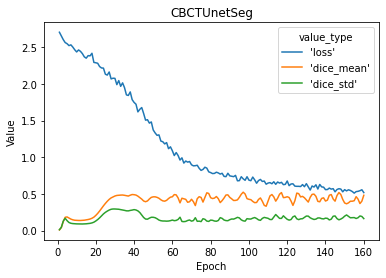

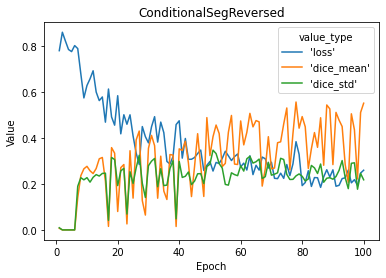

In [87]:
project_plots = {}
#Loop through projects
for project in projects:
    df_project = df[df['project'] == project] #Get all the rows for a project
    project_plots[project] = sns.lineplot(x='epoch', y='value', hue='value_type', data=df_project) #Plot
    project_plots[project].set(title=project, xlabel='Epoch', ylabel='Value') #Set title and labels
    plt.show() #Show each plot
